# Exercises on clustering

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
import os
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="Datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

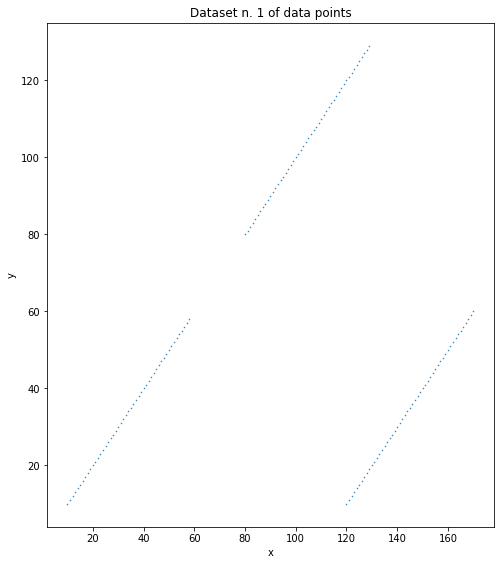

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

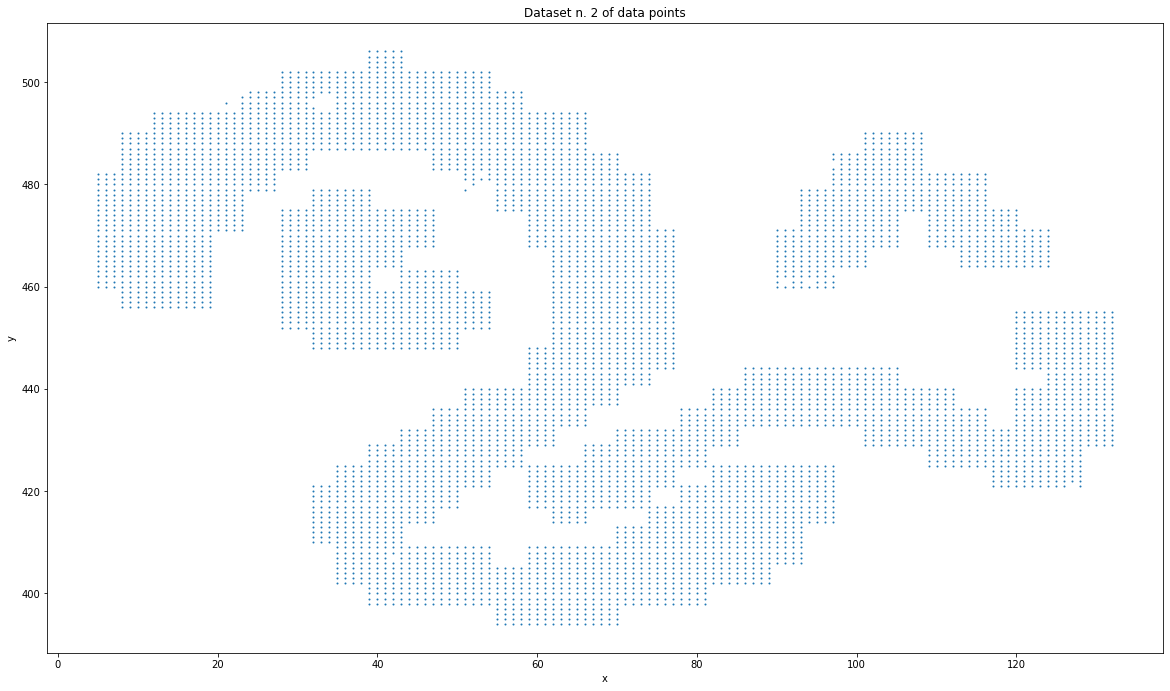

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

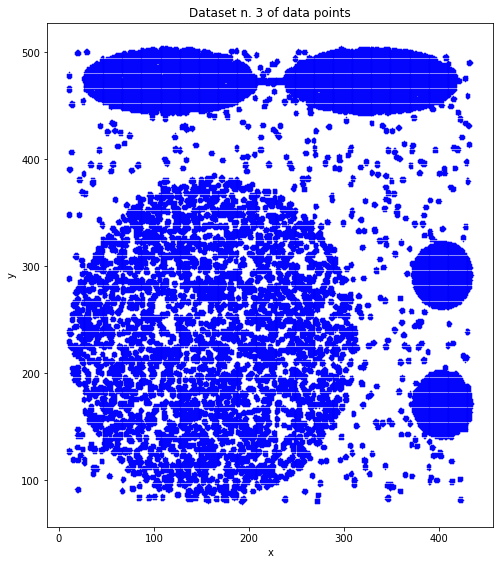

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [5]:
import csv
import sys
from os.path import join
from kneed import DataGenerator, KneeLocator

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

file_path="Datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

In the following program we plot the clusters

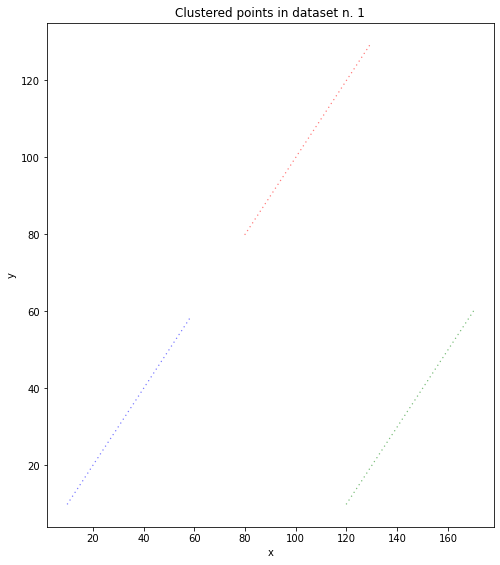

In [6]:
import matplotlib.pyplot as plt
import PyPDF2
from PyPDF2 import PdfFileMerger, PdfFileReader

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

In [7]:
np.random.seed(5)

k=3
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)

In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

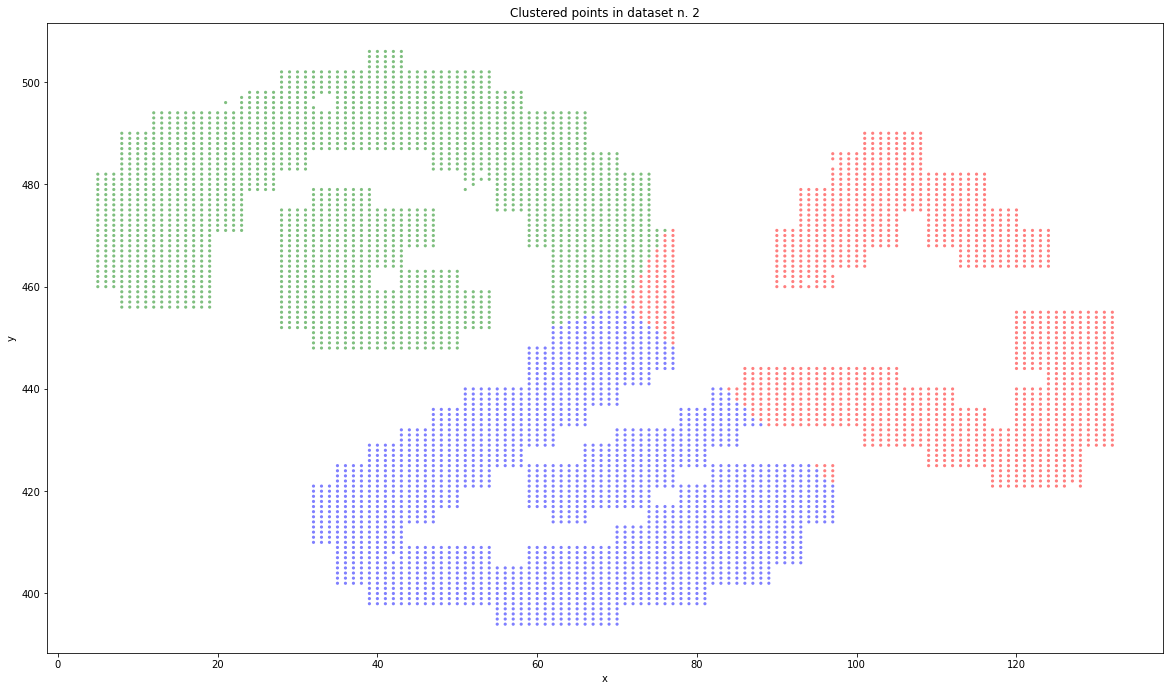

In [8]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=10, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell I propose you to perform clustering with K-means on the dataset3.

In [9]:
np.random.seed(5)

k=4
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)

In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

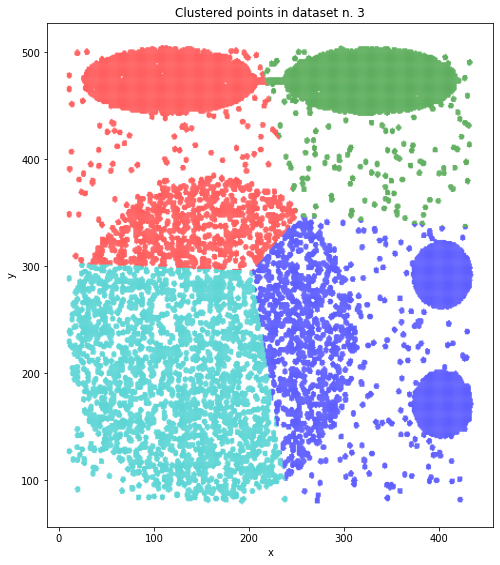

In [10]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

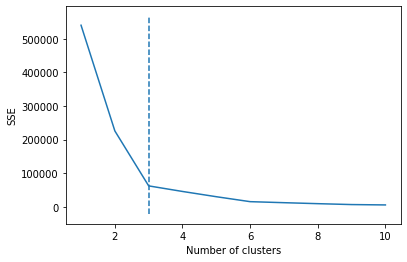

In [11]:
# Valutazione del primo dataset
# inertia_ : float  -  Sum of squared distances of samples to their closest cluster center.
# Tramite questo metodo mi calcolo Sum of Squared Erros degli esempi calcolanddo la distanza 
# dal centro del cluster all'interno del quale sono stati classificati. Il primo parametro  
# mi dirà il numero di cluster, mentre il secondo il valore effettivo
# Esempio di output: {1: 540169.52, 2: 225889.10891089108, .... }
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data1)
    sse[k] = kmeans.inertia_
    
# Per calcolare l'elbow uso questa libreria esterna
kn = KneeLocator(
    list(sse.keys()),
    list(sse.values()),
    curve='convex',
    direction='decreasing',
    interp_method='polynomial',
)

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

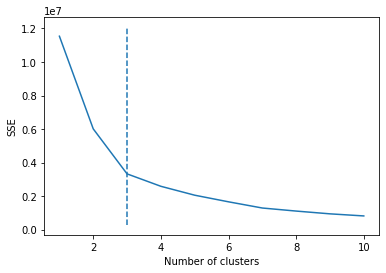

In [12]:
# Valutazione del secondo dataset
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data2)
    sse[k] = kmeans.inertia_
    
kn = KneeLocator(
    list(sse.keys()),
    list(sse.values()),
    curve='convex',
    direction='decreasing',
    interp_method='polynomial',
)

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

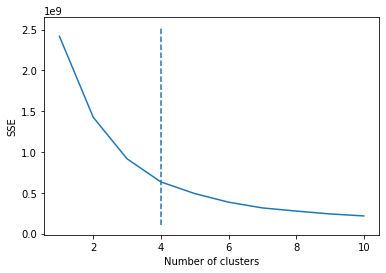

In [13]:
# Valutazione del terzo dataset
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data3)
    sse[k] = kmeans.inertia_
    
kn = KneeLocator(
    list(sse.keys()),
    list(sse.values()),
    curve='convex',
    direction='decreasing',
    interp_method='polynomial',
)

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

# Silhouettes per il primo dataset

For n_clusters = 2 The average silhouette_score is : 0.5651096232579514


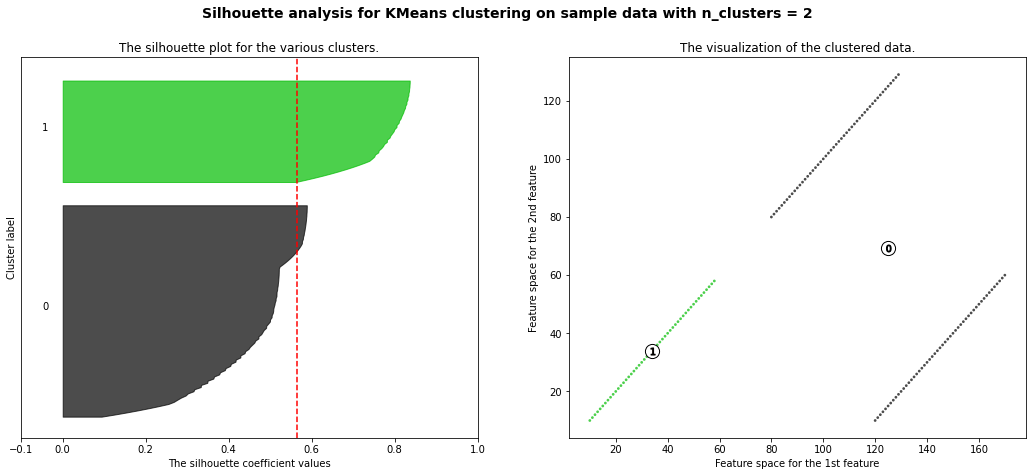

For n_clusters = 3 The average silhouette_score is : 0.7229402453727759


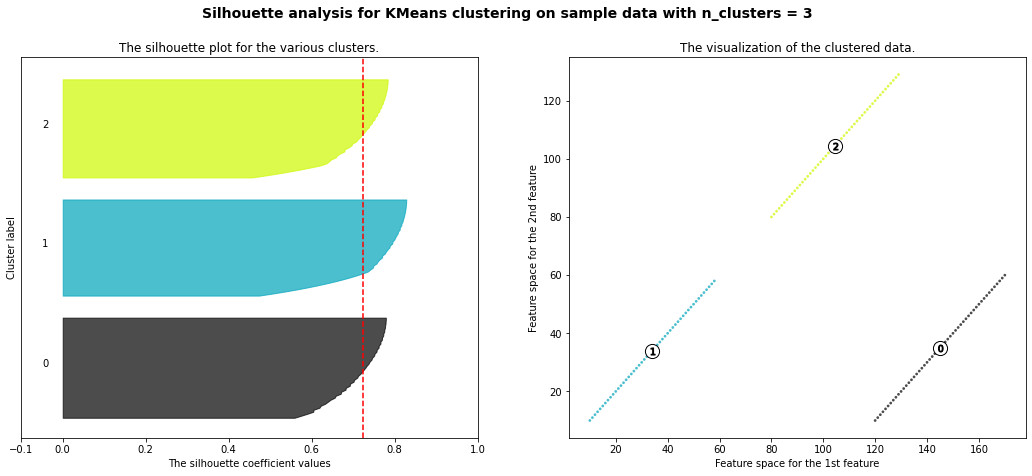

For n_clusters = 4 The average silhouette_score is : 0.6824925173029859


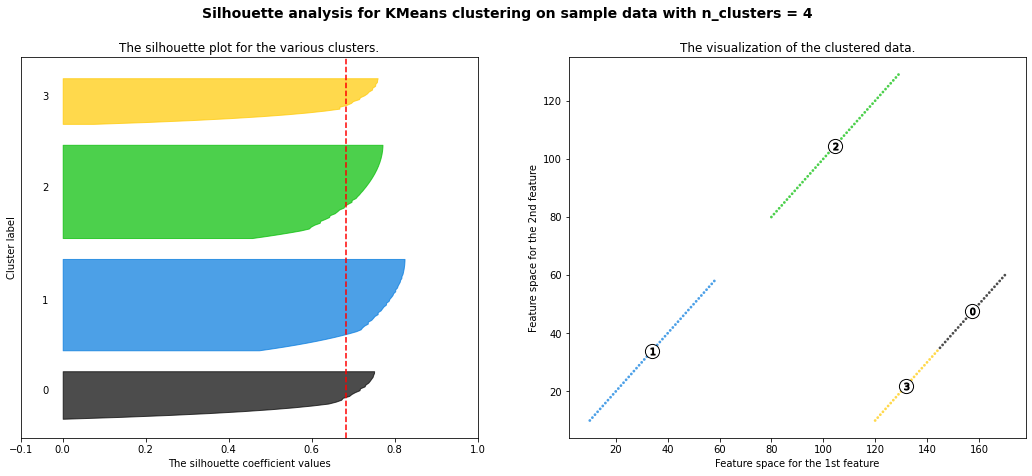

For n_clusters = 5 The average silhouette_score is : 0.6372722940289592


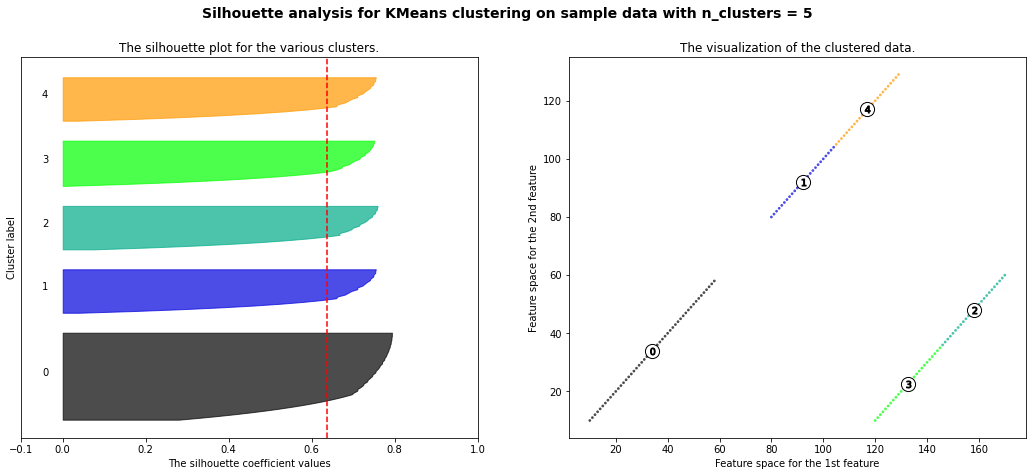

For n_clusters = 6 The average silhouette_score is : 0.6113129278986535


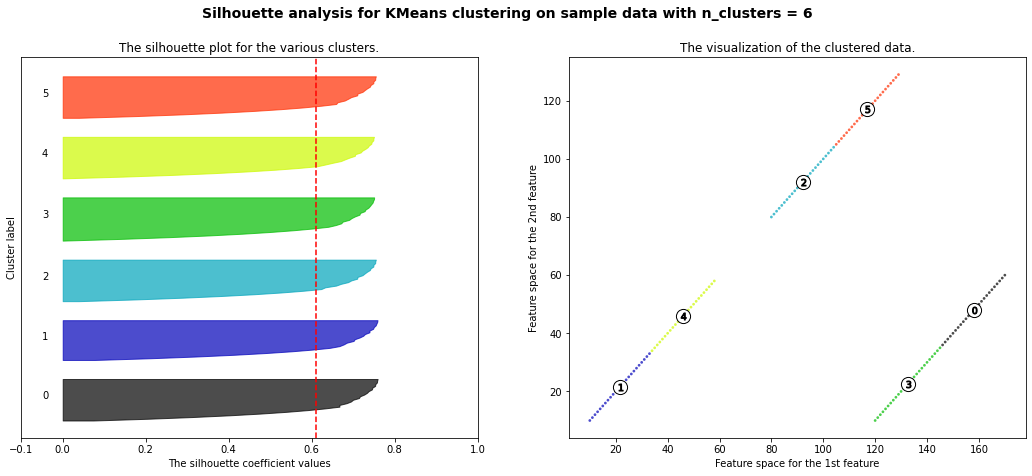

For n_clusters = 7 The average silhouette_score is : 0.595587703417737


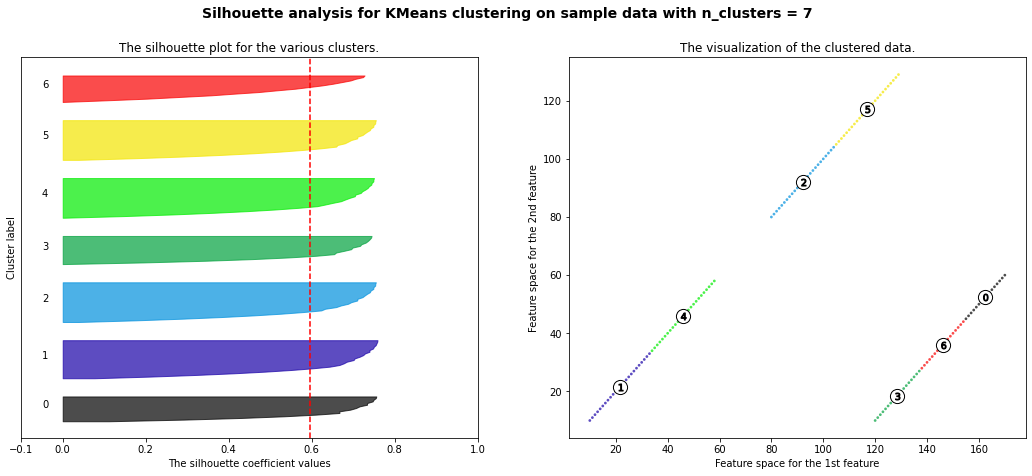

For n_clusters = 8 The average silhouette_score is : 0.5797525125119961


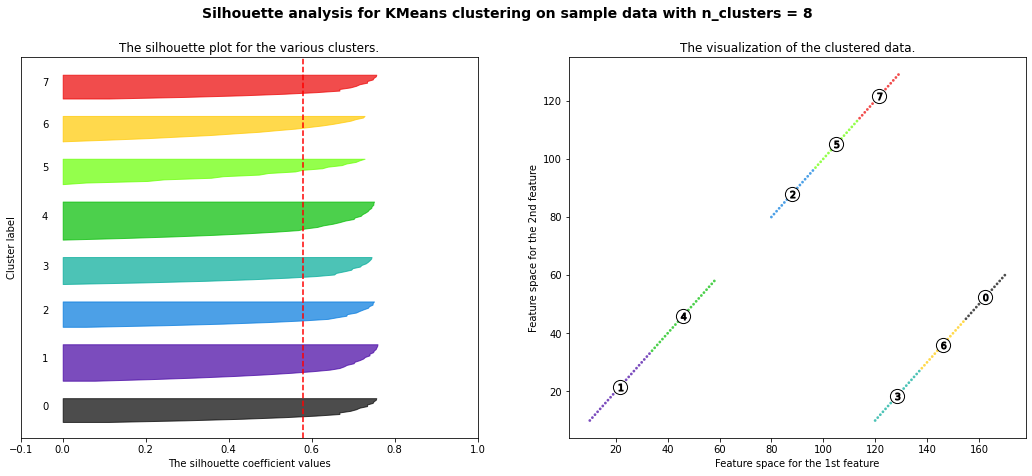

For n_clusters = 9 The average silhouette_score is : 0.5652923851357741


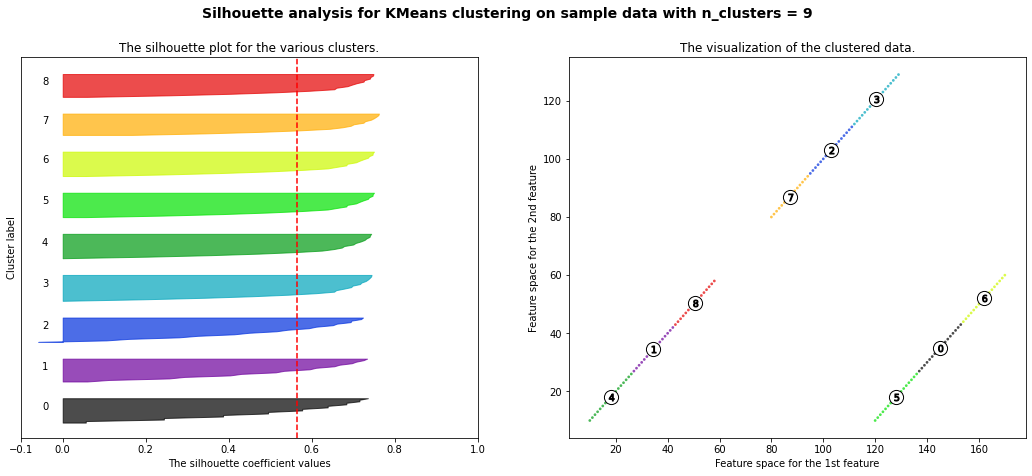

For n_clusters = 10 The average silhouette_score is : 0.5558676358685211


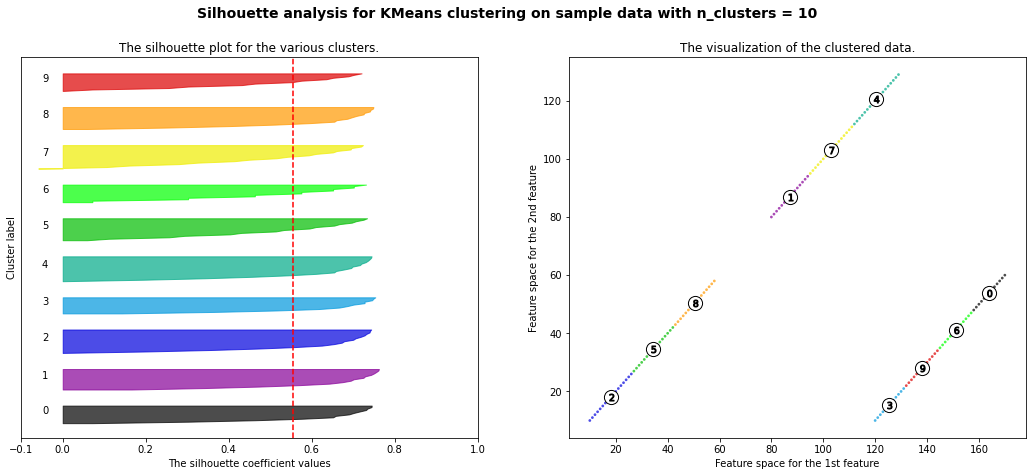

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# **Debug**
if (os.path.isfile("SilhouettesDataset1.pdf")): os.remove("SilhouettesDataset1.pdf")

#Essendo un processo pesante evito di eseguirlo se possibile
if not(os.path.isfile("SilhouettesDataset1.pdf")):

    # Creo una variabile che utlizzerò per il salvataggio dei pdf
    filenames = list();

    for n_clusters in range(2,11):
        # Predispongo i due subplots per la rappresentazione
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # Il primo sublot rappresenta la Silhouette
        # Imposto il range della silhouette [-0.1; 1]
        ax1.set_xlim([-0.1, 1])
    
        # Accorgimento grafico per dare un po' di spazio alla
        # rappresentazione dei clusters
        ax1.set_ylim([0, len(data1) + (n_clusters + 1) * 10])

        # Inizializzo i cluster impostando il seed a 10 
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        # In cluster labels avrò un array con tante posizioni quante sono i dati,
        # al cui interno vi sarà il cluster di riferimento
        # Esempio: [ 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 ... ]
        cluster_labels = clusterer.fit_predict(data1)

        # Calcolo e stampo lo score della silhouette in relazione
        # al cluster di riferimento
        silhouette_avg = silhouette_score(data1, cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

        # Computo gli score della silhouette per ogni dato
        # Questa funzione misura quanto bene sono stati clusterizzati con
        # esempi simili a loro stessi
        sample_silhouette_values = silhouette_samples(data1, cluster_labels)

        y_lower = 10
    
        for i in range(n_clusters):
            # Procedo con l'aggregare i punteggi della silhouette 
            # per i campioni appartenenti al cluster i e li ordino
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Setto il colore per differenziarli
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                              ith_cluster_silhouette_values, 
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Identifico la silohuette inserendogli al suo fianco
            # il numero di k utilizzato
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10 

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # Retta vertical che identifica lo score medio per i valori
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Ora plotto la seconda figura nella quale mostro i cluster graficamente
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(data1[:, 0], data1[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Utilizzo dei numeri cerchiati per farli notare al meglio
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

        plt.show()
        filenames.append(str(n_clusters)+".pdf")
        # Non eseguo qui il processo di eliminazione/merging perche'
        # a seconda del file ho tempi di salvataggio diversi
        fig.savefig(str(n_clusters)+".pdf")
    
    # Elimino i file temporanei e creo un unico file pdf
    merger = PdfFileMerger()
    for filename in filenames:
        merger.append(filename)
        os.remove(filename)

    merger.write("SilhouettesDataset1.pdf")

# Silhouettes per il secondo dataset

For n_clusters = 2 The average silhouette_score is : 0.43322366812579544


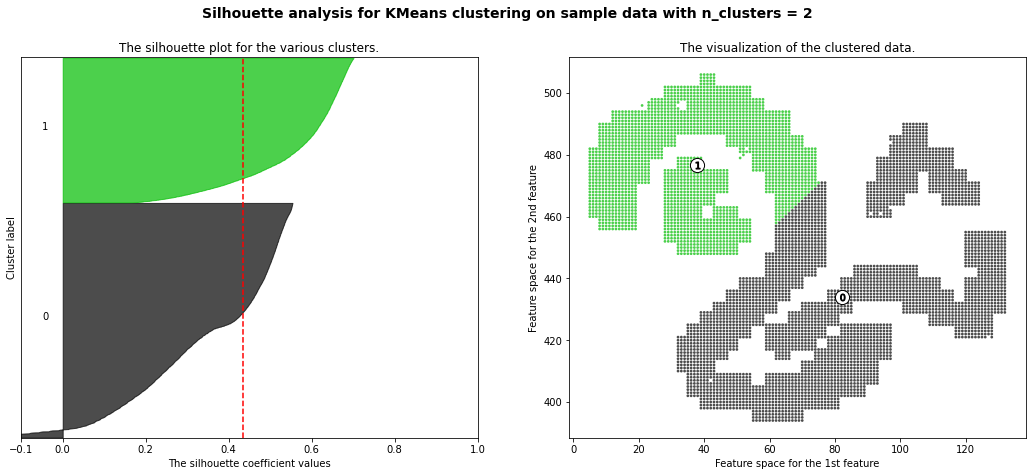

For n_clusters = 3 The average silhouette_score is : 0.48006914019384417


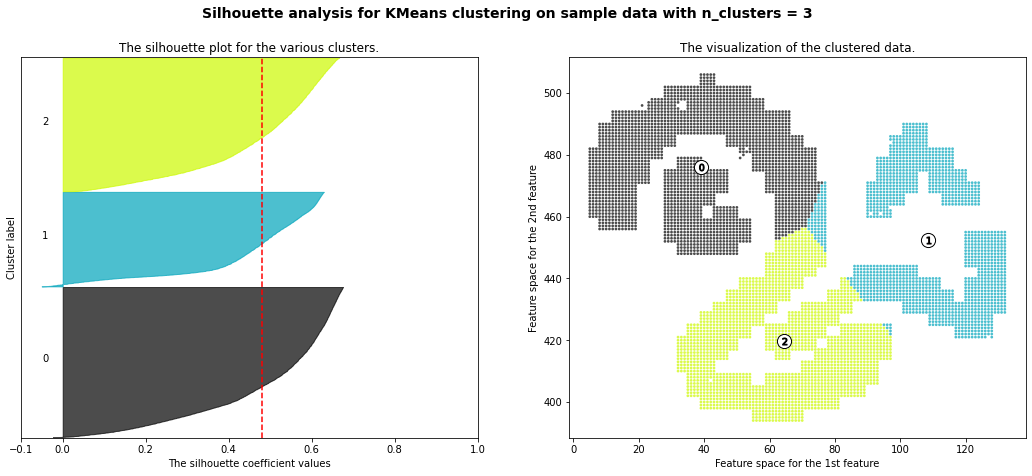

For n_clusters = 4 The average silhouette_score is : 0.4161849907517932


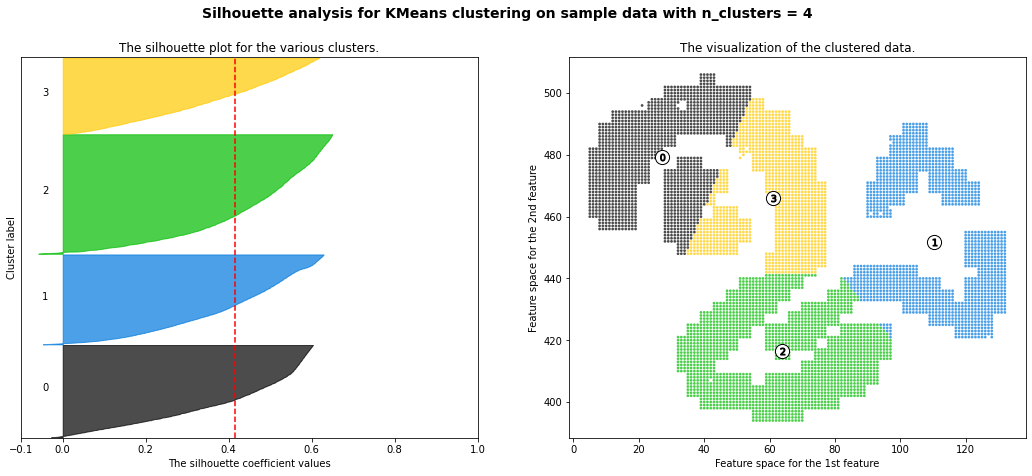

For n_clusters = 5 The average silhouette_score is : 0.4247453357049124


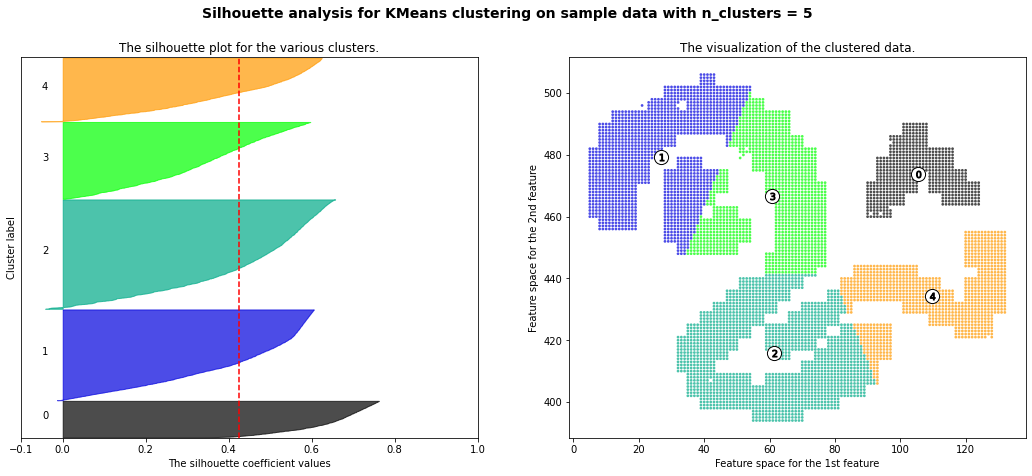

For n_clusters = 6 The average silhouette_score is : 0.41023090652164795


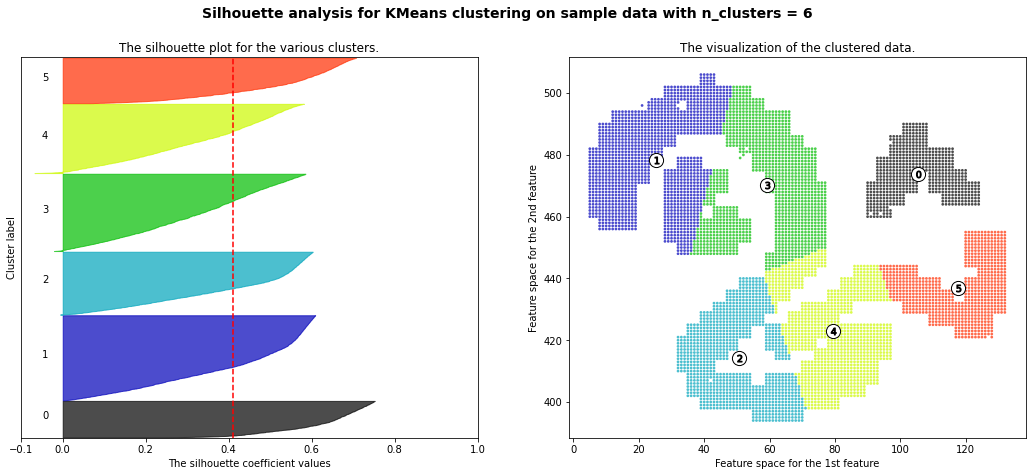

For n_clusters = 7 The average silhouette_score is : 0.433295789519672


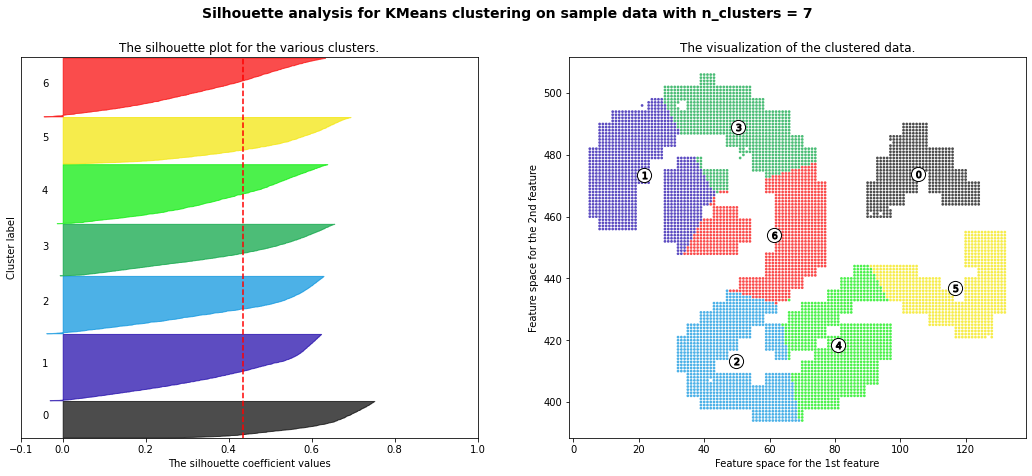

For n_clusters = 8 The average silhouette_score is : 0.44542881887774544


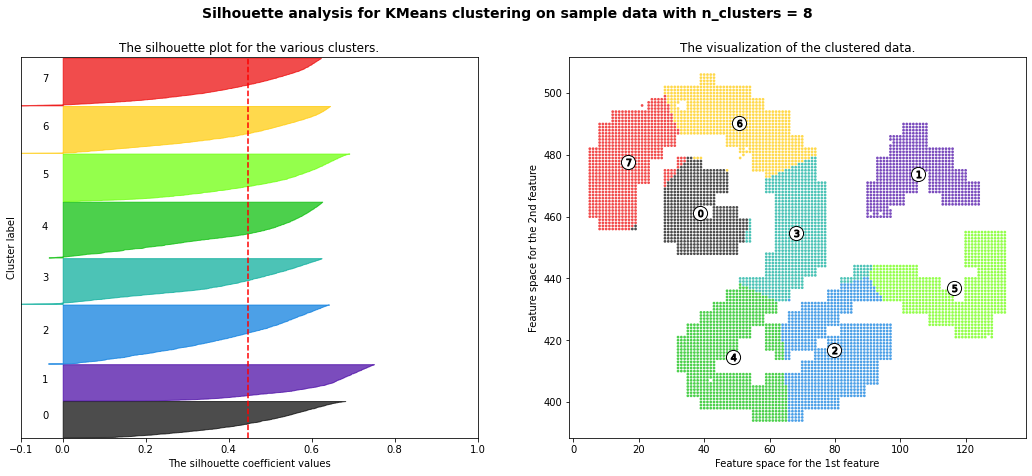

For n_clusters = 9 The average silhouette_score is : 0.44736504422327555


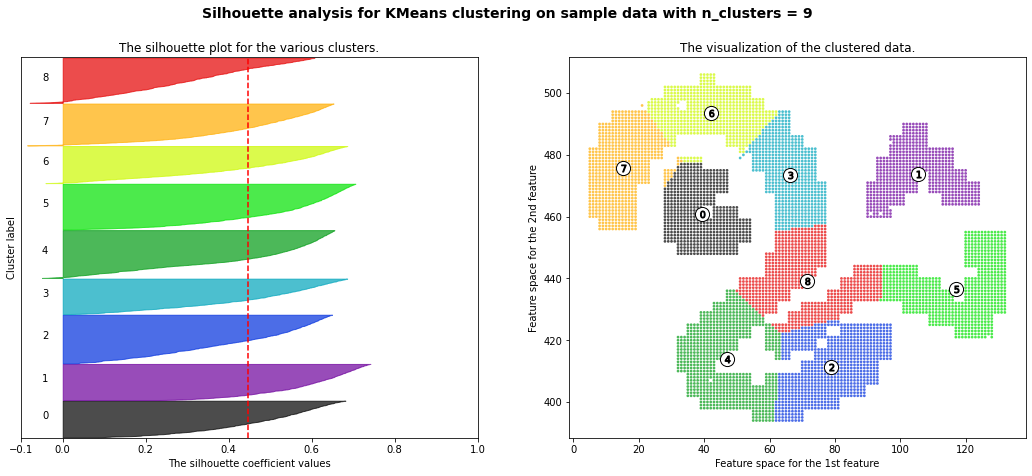

For n_clusters = 10 The average silhouette_score is : 0.44017340927380316


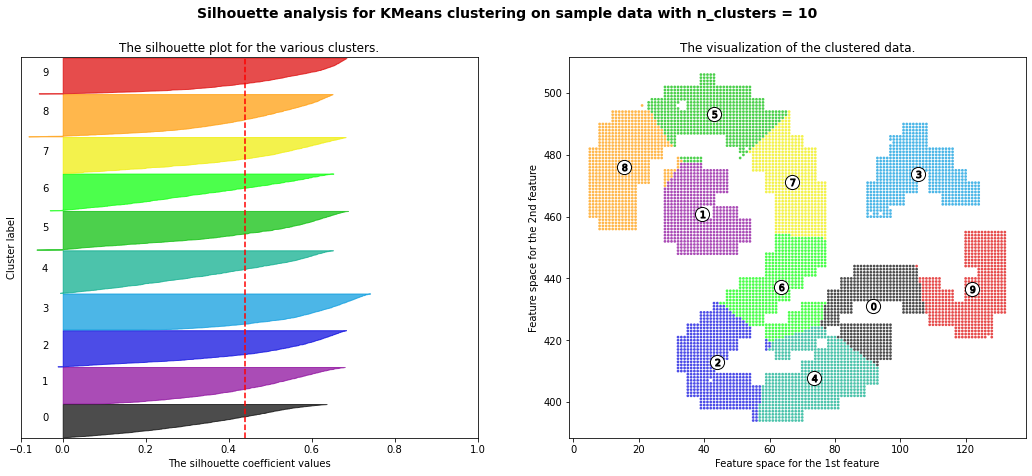

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# **Debug**
os.remove("SilhouettesDataset2.pdf")

#Essendo un processo pesante evito di eseguirlo se possibile
if not(os.path.isfile("SilhouettesDataset2.pdf")):

    # Creo una variabile che utlizzerò per il salvataggio dei pdf
    filenames = list();

    for n_clusters in range(2,11):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
    
        ax1.set_ylim([0, len(data2) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(data2)

        silhouette_avg = silhouette_score(data2, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(data2, cluster_labels)


        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10 

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(data2[:, 0], data2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        plt.show()
        filenames.append(str(n_clusters)+".pdf")
        fig.savefig(str(n_clusters)+".pdf")
    
    # Elimino i file temporanei e creo un unico file pdf
    merger = PdfFileMerger()
    for filename in filenames:
        merger.append(filename)
        os.remove(filename)

    merger.write("SilhouettesDataset2.pdf")

# Silhouettes per il terzo dataset

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Essendo un processo pesante evito di eseguirlo se possibile
if not(os.path.isfile("SilhouettesDataset3.pdf")):

    # Creo una variabile che utlizzerò per il salvataggio dei pdf
    filenames = list();

    for n_clusters in range(2,11):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
    
        ax1.set_ylim([0, len(data3) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(data3)

        silhouette_avg = silhouette_score(data3, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(data3, cluster_labels)


        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10 

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(data3[:, 0], data3[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        plt.show()
        filenames.append(str(n_clusters)+".pdf")
        fig.savefig(str(n_clusters)+".pdf")
    
    # Elimino i file temporanei e creo un unico file pdf
    merger = PdfFileMerger()
    for filename in filenames:
        merger.append(filename)
        os.remove(filename)

    merger.write("SilhouettesDataset3.pdf")

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

# DBSCAN on dataset 2

In [17]:
from sklearn.cluster import DBSCAN

dbscan1 = DBSCAN(eps=2, min_samples=10).fit(data2)

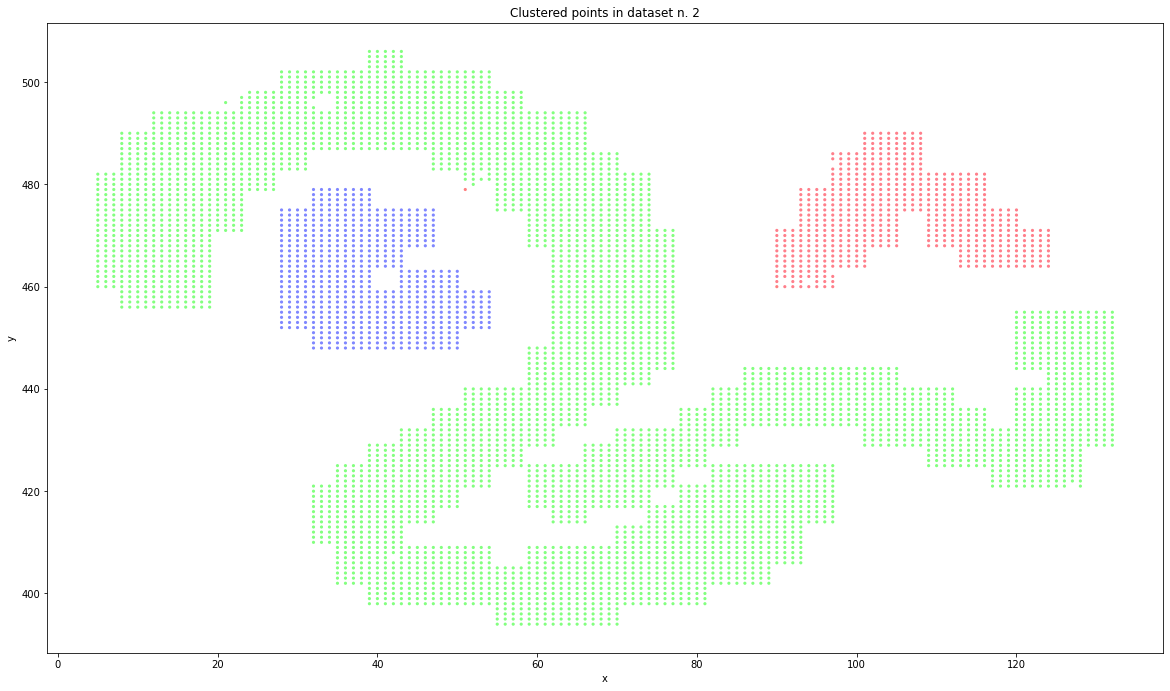

In [18]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.scatter(data2[:,0], data2[:,1], s=10, edgecolors='none', c=dbscan1.labels_, alpha=0.5, cmap='hsv')

plt.show()

# DBSCAN on dataset 3

In [19]:
np.random.seed(5)

dbscan2 = DBSCAN(eps=2, min_samples=10).fit(data3)

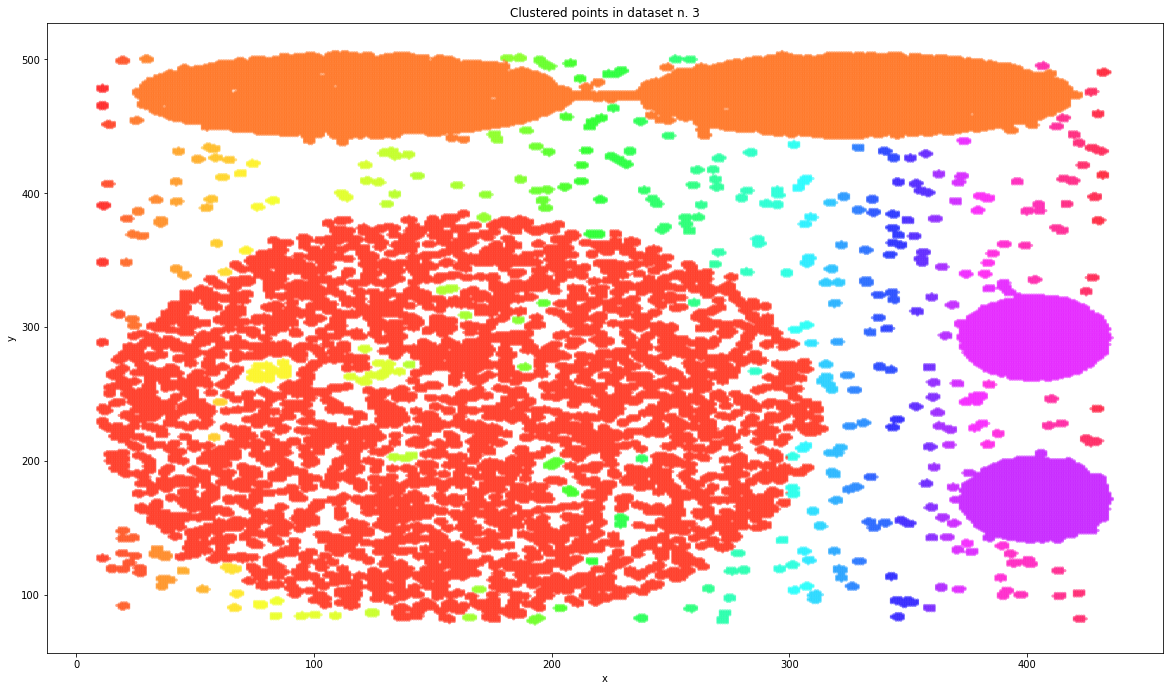

In [20]:
from itertools import cycle
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.scatter(data3[:,0], data3[:,1], s=10, edgecolors='none', c=dbscan2.labels_, alpha=0.5, cmap='hsv')

plt.show()

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

# Test sul dataset 2

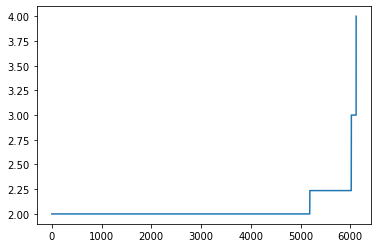

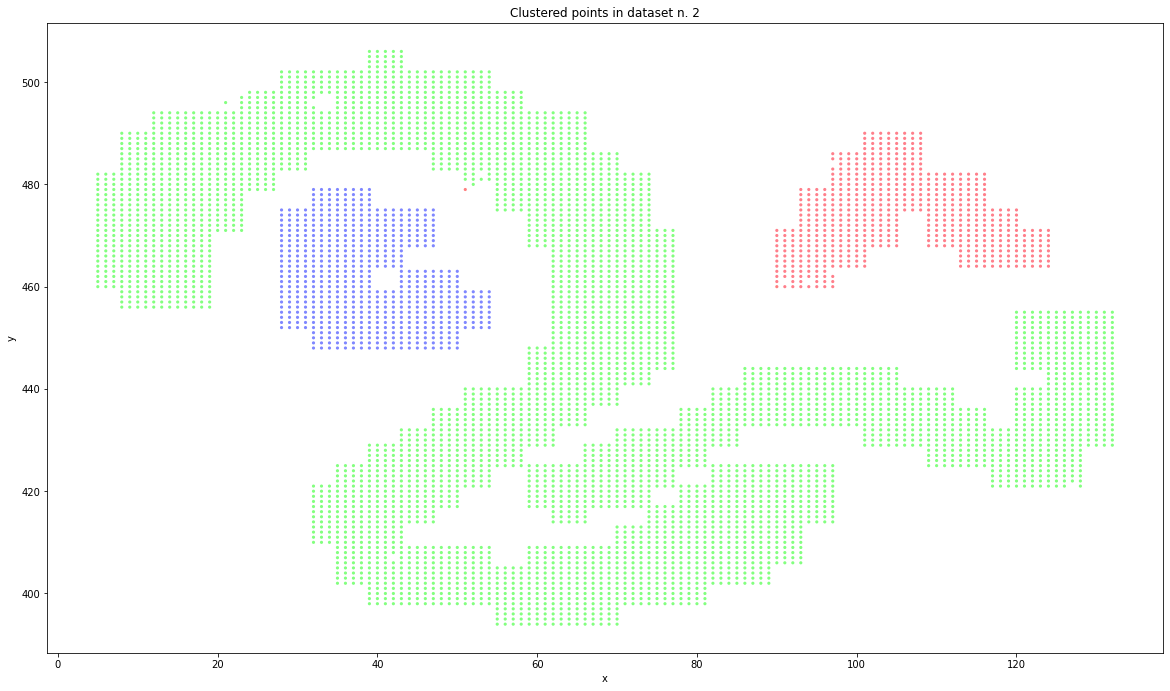

In [21]:
from sklearn.neighbors import NearestNeighbors

ns = 10
nbrs = NearestNeighbors(n_neighbors=ns).fit(data2)
distances, indices = nbrs.kneighbors(data2)
distanceDec = sorted(distances[:,ns-1], reverse=False)
plt.plot(list(range(1,len(distanceDec)+1)), distanceDec)

np.random.seed(5)

dbscan = DBSCAN(eps=2, min_samples=10).fit(data2)

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.scatter(data2[:,0], data2[:,1], s=10, edgecolors='none', c=dbscan.labels_, alpha=0.5, cmap='hsv')

plt.show()

# Test sul dataset 3

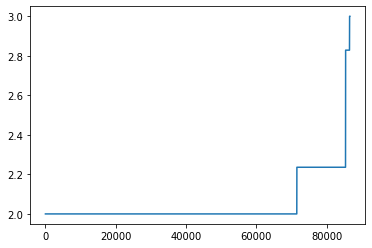

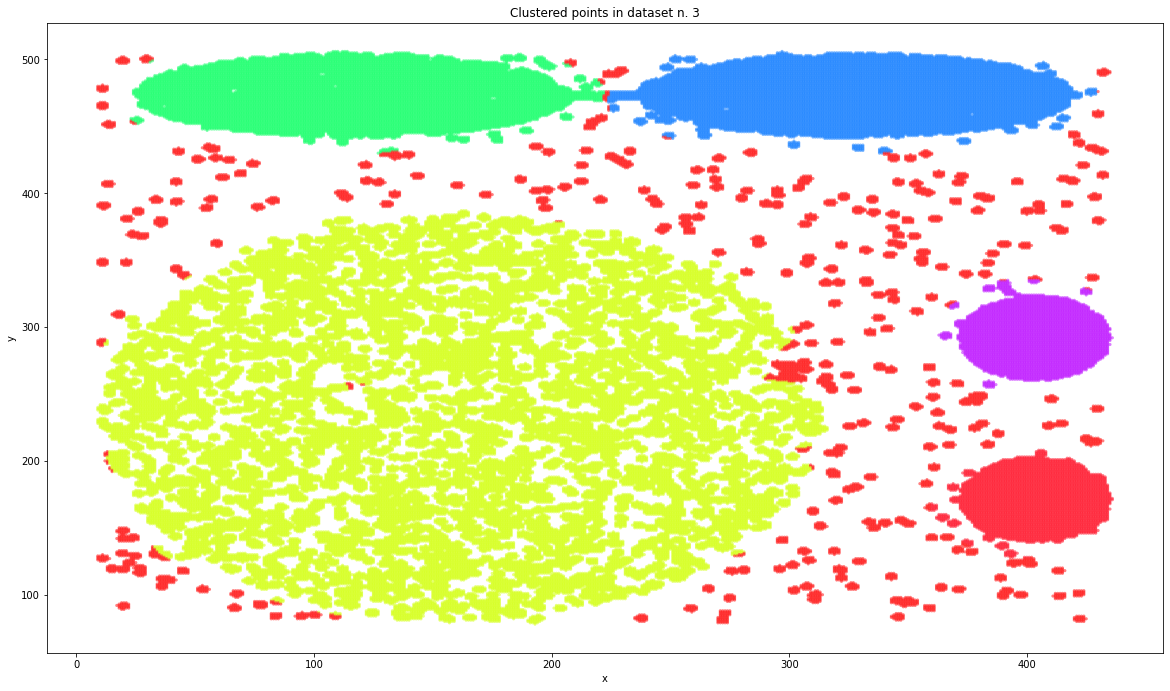

In [22]:
from sklearn.neighbors import NearestNeighbors

ns = 10
nbrs = NearestNeighbors(n_neighbors=ns).fit(data3)
distances, indices = nbrs.kneighbors(data3)
distanceDec = sorted(distances[:,ns-1], reverse=False)
plt.plot(indices[:,0], distanceDec)

np.random.seed(5)

dbscan = DBSCAN(eps=14, min_samples=400).fit(data3)

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.scatter(data3[:,0], data3[:,1], s=10, edgecolors='none', c=dbscan.labels_, alpha=0.5, cmap='hsv')
plt.show()